# This is for disparity from depth maps
There is a few different options for opening the images, ranging from PIL, pillow, OpenCV to matplotlib

In [2]:
#Import relevant modules
import os

from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Populating the interactive namespace from numpy and matplotlib


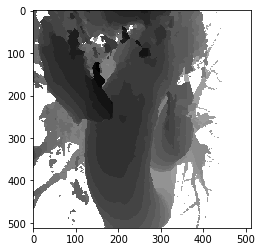

In [3]:
#Setup locations
base_dir = ""
file_name = "depth.png"
image_location = os.path.join(base_dir, file_name)

#Note that these seem to produce rather different results
depth = Image.open(image_location)
depth.load()
data = np.asarray( depth, dtype="int32" )
img = mpimg.imread(image_location)
imgplot = plt.imshow(img, cmap=plt.cm.gray)

In [4]:
# Experiments
type(depth)
type(data)
type(img)

data
img
data[0][500]
data[200][100]
img.shape

PIL.PngImagePlugin.PngImageFile

numpy.ndarray

numpy.ndarray

array([[238, 238, 238, ..., 255, 255, 255],
       [238, 238, 238, ..., 255, 255, 255],
       [238, 238, 238, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

array([[ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]], dtype=float32)

255

234

(512, 512)

In [5]:
def depth_to_disparity(depth_value, baseline, focal_length, shift = 0.0):
    """
    Returns a disparity value from a depth value
    
    Keyword arguments:
    depth_value -- the input depth
    baseline -- the distance between neighbouring cameras in the grid
    focal_length -- the depth image capturing camera's focal length
    shift -- an optional distance between neighbouring images 
          -- principal point offsets (default 0.0),
          -- note that this is from the HCI paper on their capture process
    """
    disparity = (baseline * focal_length) / depth_value - shift
    return disparity

In [13]:
def depth_buffer_to_eye(buffer_depth, near, far):
    """
    Returns eye space depth from a [0,1] depth buffer value.
    First converts the buffer value to NDC in [-1, 1].
    Then inverts the perspective projection to give eye space depth.
    
    Keyword arguments:
    buffer_depth -- the input depth buffer value
    near -- the depth of the near plane (positive)
    far -- the depth of the far plane (positive)
    """
    ndc_depth = 2.0 * buffer_depth - 1.0
    eye_depth = 2.0 * near * far / (near + far - ndc_depth * (far - near))
    return eye_depth

array([[ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93333334,  0.93333334,  0.93333334, ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]], dtype=float32)

array([[   83.02583313,    83.02583313,    83.02583313, ...,
         1000.        ,  1000.        ,  1000.        ],
       [   83.02583313,    83.02583313,    83.02583313, ...,
         1000.        ,  1000.        ,  1000.        ],
       [   83.02583313,    83.02583313,    83.02583313, ...,
         1000.        ,  1000.        ,  1000.        ],
       ..., 
       [ 1000.        ,  1000.        ,  1000.        , ...,
         1000.        ,  1000.        ,  1000.        ],
       [ 1000.        ,  1000.        ,  1000.        , ...,
         1000.        ,  1000.        ,  1000.        ],
       [ 1000.        ,  1000.        ,  1000.        , ...,
         1000.        ,  1000.        ,  1000.        ]], dtype=float32)

array([[ 0.02047556,  0.02047556,  0.02047556, ...,  0.0017    ,
         0.0017    ,  0.0017    ],
       [ 0.02047556,  0.02047556,  0.02047556, ...,  0.0017    ,
         0.0017    ,  0.0017    ],
       [ 0.02047556,  0.02047556,  0.02047556, ...,  0.0017    ,
         0.0017    ,  0.0017    ],
       ..., 
       [ 0.0017    ,  0.0017    ,  0.0017    , ...,  0.0017    ,
         0.0017    ,  0.0017    ],
       [ 0.0017    ,  0.0017    ,  0.0017    , ...,  0.0017    ,
         0.0017    ,  0.0017    ],
       [ 0.0017    ,  0.0017    ,  0.0017    , ...,  0.0017    ,
         0.0017    ,  0.0017    ]], dtype=float32)

array([[ 0.00714286,  0.00714286,  0.00714286, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00714286,  0.00714286,  0.00714286, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00714286,  0.00714286,  0.00714286, ...,  0.00666667,
         0.00666667,  0.00666667],
       ..., 
       [ 0.00666667,  0.00666667,  0.00666667, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00666667,  0.00666667,  0.00666667, ...,  0.00666667,
         0.00666667,  0.00666667],
       [ 0.00666667,  0.00666667,  0.00666667, ...,  0.00666667,
         0.00666667,  0.00666667]])

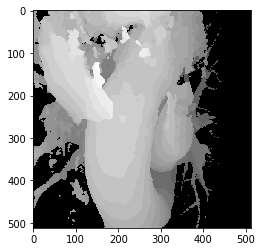

In [15]:
eye_depth = depth_buffer_to_eye(img, 6.0, 1000)
disparity = depth_to_disparity(eye_depth, baseline = 1, focal_length = 1.7, shift = 0)
disparity2 = depth_to_disparity(data, baseline = 1, focal_length = 1.7, shift = 0)
#imgplot = plt.imshow(disparity, cmap=plt.cm.gray)
imgplot2 = plt.imshow(disparity, cmap= plt.cm.gray)
img
eye_depth
disparity
disparity2

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.81000000e+02,   3.23200000e+03,   3.78900000e+03,
          9.53900000e+03,   5.45370000e+04,   2.06790000e+04,
          1.52090000e+04,   1.58940000e+04,   0.00000000e+00,
          1.16090000e+04,   9.67400000e+03,   6.75800000e+03,
          0.00000000e+00,   6.59900000e+03,   0.00000000e+00,
          3.50100000e+03,   0.00000000e+00,   0.00000000e+00,
          4.99100000e+03,   0.00000000e+00,   3.48600000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.38700000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.50000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.60000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

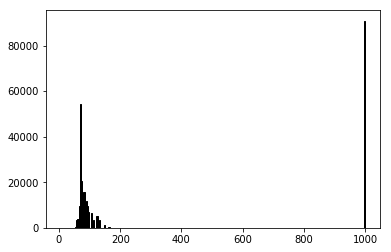

In [18]:
plt.hist(eye_depth.ravel(), bins=256, range=(6, 1000), fc='k', ec='k')